## Heuristic Analysis
Below is the overall result of 200 games played per match
<img src="files\tournament.JPG">

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [3]:
opp = {0: 'Random', 1: 'MM_Open', 2: 'MM_Center', 3: 'MM_Improved', 4: 'AB_Open', 5: 'AB_Center', 6: 'AB_Improved'}
totaldata = {}

AB_improved = [(187,13), (154,46), (171,29), (148,52), (108,92), (116,84), (98,102)]
AB_custom = [(188,12), (153,47), (181,19), (153,47), (104,96), (115,85), (101,99)]
AB_custom_2 = [(187,13), (146,54), (179,21), (145,55), (103,97), (111,89), (99,101)]
AB_custom_3 = [(189,11), (155,45), (181,19), (141,59), (100,100), (114,86), (100,100)]
AB_custom_4 = [(182,18), (154,46), (176,24), (136,64), (99,101), (105,95), (106,94)]
AB_custom_5 = [(191,9), (150,50), (174,26), (145,55), (109,91), (109,91), (90,110)]
AB_custom_6 = [(187,13), (157,43), (172,28), (147,53), (107,93), (111,89), (98,102)]
AB_custom_7 = [(189,11), (144,56), (173,27), (134,66), (95,105), (118,82), (91,109)]


### Improved Alpha-Beta Pruning algorithm
The algorith used as a basis of comparison

##### Results:

In [4]:
datan = AB_improved
datawin = [datan[i][0]/2 for i in range(len(datan))]
totaldata['AB_improved']=datawin
data = {'AB_Improved Wins/Losses:': datan, 'AB_Improved Win Ratio (%):': datawin}
df = pd.DataFrame(data)
df = df.rename(index=opp)
display(df)

totalwinratio = sum(datawin)/len(datawin)
print("Total Win Ratio (%): {}".format(round(totalwinratio, 2)))

,AB_Improved Win Ratio (%):,AB_Improved Wins/Losses:
Random,93.5,"(187, 13)"
MM_Open,77.0,"(154, 46)"
MM_Center,85.5,"(171, 29)"
MM_Improved,74.0,"(148, 52)"
AB_Open,54.0,"(108, 92)"
AB_Center,58.0,"(116, 84)"
AB_Improved,49.0,"(98, 102)"


Total Win Ratio (%): 70.14


### Heuristic 1: Difference between each players move, decaying aggressivity, prioratizing center position

This heuristic prioratizes moves that leads to higher number of player moves with lower number of opponents moves. It starts with a higher aggressive focus on opponents moves that decays as the board fills up. It also prioratizes moves closer to the center.

##### The heuristic formula:

dist = distance between player move and center from 0 being center to 1 being a corner

decay = # of current blank spaces / # number of total blank spaces

(# of player moves - # of opponents moves \* 2 \* decay) * 1/dist

##### Results:

In [11]:
datan = AB_custom
datawin = [datan[i][0]/2 for i in range(len(datan))]
totaldata['AB_custom']=datawin
data = {'AB_Custom_1 Wins/Losses:': datan, 'AB_Custom_1 Win Ratio (%):': datawin}
df = pd.DataFrame(data)
df = df.rename(index=opp)
display(df)

totalwinratio = sum(datawin)/len(datawin)
print("Total Win Ratio (%): {}".format(round(totalwinratio, 2)))

,AB_Custom_1 Win Ratio (%):,AB_Custom_1 Wins/Losses:
Random,94.0,"(188, 12)"
MM_Open,76.5,"(153, 47)"
MM_Center,90.5,"(181, 19)"
MM_Improved,76.5,"(153, 47)"
AB_Open,52.0,"(104, 96)"
AB_Center,57.5,"(115, 85)"
AB_Improved,50.5,"(101, 99)"


Total Win Ratio (%): 71.07


### Heuristic 2: Difference between each players move with an aggressive approach

This heuristic prioratizes moves that leads to higher number of player moves with lower number of opponents moves while putting more value on lower number of opponents moves.

##### The heuristic formula:

\# of player moves - # of opponents moves \* 2

##### Results:

In [12]:
datan = AB_custom_2
datawin = [datan[i][0]/2 for i in range(len(datan))]
totaldata['AB_custom_2']=datawin
data = {'AB_Custom_2 Wins/Losses:': datan, 'AB_Improved Win Ratio (%):': datawin}
df = pd.DataFrame(data)
df = df.rename(index=opp)
display(df)

totalwinratio = sum(datawin)/len(datawin)
print("Total Win Ratio (%): {}".format(round(totalwinratio, 2)))

,AB_Custom_2 Wins/Losses:,AB_Improved Win Ratio (%):
Random,"(187, 13)",93.5
MM_Open,"(146, 54)",73.0
MM_Center,"(179, 21)",89.5
MM_Improved,"(145, 55)",72.5
AB_Open,"(103, 97)",51.5
AB_Center,"(111, 89)",55.5
AB_Improved,"(99, 101)",49.5


Total Win Ratio (%): 69.29


### Heuristic 3: Difference between each players move

This heuristic prioratizes moves that leads to higher number of player moves with lower number of opponents moves. 

##### The heuristic formula:

\# of player moves - # of opponents moves

##### Results:

In [13]:
datan = AB_custom_3
datawin = [datan[i][0]/2 for i in range(len(datan))]
totaldata['AB_custom_3']=datawin
data = {'AB_Custom_3 Wins/Losses:': datan, 'AB_Custom_3 Win Ratio (%):': datawin}
df = pd.DataFrame(data)
df = df.rename(index=opp)
display(df)

totalwinratio = sum(datawin)/len(datawin)
print("Total Win Ratio (%): {}".format(round(totalwinratio, 2)))

,AB_Custom_3 Win Ratio (%):,AB_Custom_3 Wins/Losses:
Random,94.5,"(189, 11)"
MM_Open,77.5,"(155, 45)"
MM_Center,90.5,"(181, 19)"
MM_Improved,70.5,"(141, 59)"
AB_Open,50.0,"(100, 100)"
AB_Center,57.0,"(114, 86)"
AB_Improved,50.0,"(100, 100)"


Total Win Ratio (%): 70.0


### Heuristic 6: Difference between each players move, decaying aggressivity, prioratizing outer position

This heuristic is the same as heuristic 1 except that it prioratizes position further from the center. 

##### The heuristic formula:

dist = distance between player move and center from 0 being center to 1 being a corner

decay = # of current blank spaces / # number of total blank spaces

(# of player moves - # of opponents moves \* 2 \* decay) * dist

##### Results:

In [8]:
datan = AB_custom_6
datawin = [datan[i][0]/2 for i in range(len(datan))]
totaldata['AB_custom_6']=datawin
data = {'AB_Custom_6 Wins/Losses:': datan, 'AB_Custom_6 Win Ratio (%):': datawin}
df = pd.DataFrame(data)
df = df.rename(index=opp)
display(df)

totalwinratio = sum(datawin)/len(datawin)
print("Total Win Ratio (%): {}".format(round(totalwinratio, 2)))

,AB_Custom_6 Win Ratio (%):,AB_Custom_6 Wins/Losses:
Random,93.5,"(187, 13)"
MM_Open,78.5,"(157, 43)"
MM_Center,86.0,"(172, 28)"
MM_Improved,73.5,"(147, 53)"
AB_Open,53.5,"(107, 93)"
AB_Center,55.5,"(111, 89)"
AB_Improved,49.0,"(98, 102)"


Total Win Ratio (%): 69.93


### Heuristic 4,5,7: Different Variance of the distance factor

These heuristics are different variants of heuristic 1 and 6. They also use a distance factor that either values center or outer positions. However, these are applied to either the player or the opponent. I was curious to see whether it would drastically affect the outcome. 

##### The heuristic 4 formula:

dist = distance between player move and center from 0 being center to 1 being a corner

decay = # of current blank spaces / # number of total blank spaces

(# of player moves \* 1/dist - # of opponents moves \* 2 \* decay)

##### The heuristic 5 formula:

dist = distance between player move and center from 0 being center to 1 being a corner

decay = # of current blank spaces / # number of total blank spaces

(# of player moves \* dist - # of opponents moves \* 2 \* decay)

##### The heuristic 7 formula:

dist = distance between player move and center from 0 being center to 1 being a corner

decay = # of current blank spaces / # number of total blank spaces

(# of player moves - # of opponents moves \* 2 \* decay \* 1/dist)

##### Heuristic 4,5,7 Results:

In [14]:
datan = AB_custom_4
datawin = [datan[i][0]/2 for i in range(len(datan))]
totaldata['AB_custom_4']=datawin
data = {'AB_custom_4 Wins/Losses:': datan, 'AB_custom_4 Win Ratio (%):': datawin}
df = pd.DataFrame(data)
df = df.rename(index=opp)
display(df)

totalwinratio = sum(datawin)/len(datawin)
print("Total Win Ratio (%): {}".format(round(totalwinratio, 2)))

,AB_custom_4 Win Ratio (%):,AB_custom_4 Wins/Losses:
Random,91.0,"(182, 18)"
MM_Open,77.0,"(154, 46)"
MM_Center,88.0,"(176, 24)"
MM_Improved,68.0,"(136, 64)"
AB_Open,49.5,"(99, 101)"
AB_Center,52.5,"(105, 95)"
AB_Improved,53.0,"(106, 94)"


Total Win Ratio (%): 68.43


##### Heuristic 5 Results:

In [16]:
datan = AB_custom_5
datawin = [datan[i][0]/2 for i in range(len(datan))]
totaldata['AB_custom_5']=datawin
data = {'AB_custom_5 Wins/Losses:': datan, 'AB_custom_5 Win Ratio (%):': datawin}
df = pd.DataFrame(data)
df = df.rename(index=opp)
display(df)

totalwinratio = sum(datawin)/len(datawin)
print("Total Win Ratio (%): {}".format(round(totalwinratio, 2)))

,AB_custom_5 Win Ratio (%):,AB_custom_5 Wins/Losses:
Random,95.5,"(191, 9)"
MM_Open,75.0,"(150, 50)"
MM_Center,87.0,"(174, 26)"
MM_Improved,72.5,"(145, 55)"
AB_Open,54.5,"(109, 91)"
AB_Center,54.5,"(109, 91)"
AB_Improved,45.0,"(90, 110)"


Total Win Ratio (%): 69.14


##### Heuristic 7 Results:

In [17]:
datan = AB_custom_7
datawin = [datan[i][0]/2 for i in range(len(datan))]
totaldata['AB_custom_7']=datawin
data = {'AB_custom_7 Wins/Losses:': datan, 'AB_custom_7 Win Ratio (%):': datawin}
df = pd.DataFrame(data)
df = df.rename(index=opp)
display(df)

totalwinratio = sum(datawin)/len(datawin)
print("Total Win Ratio (%): {}".format(round(totalwinratio, 2)))

,AB_custom_7 Win Ratio (%):,AB_custom_7 Wins/Losses:
Random,94.5,"(189, 11)"
MM_Open,72.0,"(144, 56)"
MM_Center,86.5,"(173, 27)"
MM_Improved,67.0,"(134, 66)"
AB_Open,47.5,"(95, 105)"
AB_Center,59.0,"(118, 82)"
AB_Improved,45.5,"(91, 109)"


Total Win Ratio (%): 67.43


## Conclusion:

Overall the results are fairly close to each other. A variant of Heuristic 3 (difference between number of moves) seem to be preferable. A decaying aggressivity by having the number of opponent moves being more valuable at the beginning and less valuable towards the end seem to also help. However, a distance factor, as currently implemented doesn't improve the results significantly. 

The graph below show the results of the three best heuristics and shows that the results are very close and it is hard to tell which is better.

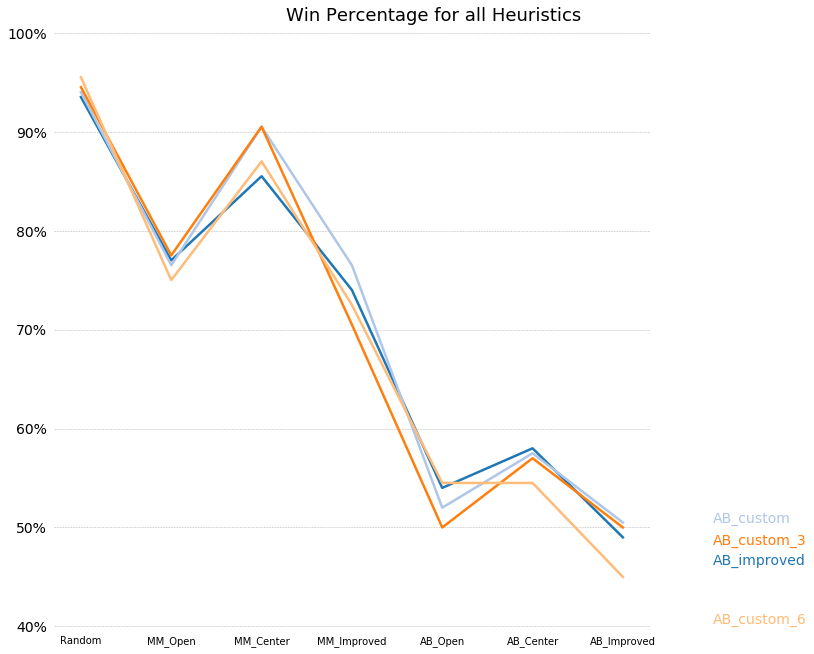

In [11]:
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896']
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
fig.subplots_adjust(left=.06, right=.75, bottom=.02, top=.94)
ax.set_ylim(39.75, 90)
plt.yticks(range(40, 101, 10), fontsize=14)
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='on', left='off', right='off', labelleft='on')

heuristic = ['AB_improved', 'AB_custom', 'AB_custom_3', 'AB_custom_6']

y_offsets = {'AB_improved': -2.25, 'AB_custom': 0.5, 'AB_custom_3': -1.25, 'AB_custom_6': -4.25}

s = []
t = []
for i in range(len(opp)):
    s.append(opp[i])
    t.append(i)
    
for i, column in enumerate(heuristic):
    line = plt.plot(t,totaldata[heuristic[i]],
                lw=2.5,
                color=color_sequence[i])
    y_pos = totaldata[heuristic[i]][-1] - 0.5

    if column in y_offsets:
        y_pos += y_offsets[column]
    plt.text(7, y_pos, column, fontsize=14, color=color_sequence[i])
    
fig.suptitle('Win Percentage for all Heuristics\n', fontsize=18, ha='center')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0+1] = s[0]
labels[1+1] = s[1]
labels[2+1] = s[2]
labels[3+1] = s[3]
labels[4+1] = s[4]
labels[5+1] = s[5]
labels[6+1] = s[6]

ax.set_xticklabels(labels)
plt.show()
